## Import

In [55]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import isodate

## Read processed data from file

In [56]:
df = pd.read_csv("../data/processed/video_data_processed.csv")

df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption
0,WkqM0ndr42c,Data School,My top 50 scikit-learn tips,If you already know the basics of scikit-learn...,python|data science|machine learning|scikit-learn,2023-04-20 14:56:43+00:00,8210.0,355.0,45.0,10051.0,hd,False
1,tWFQqaRtSQA,Data School,21 more pandas tricks,You're about to learn 21 tricks that will help...,python|pandas|data analysis|data science,2022-05-12 16:20:41+00:00,43576.0,1379.0,67.0,1480.0,hd,False
2,gd-TZut-oto,Data School,Adapt this pattern to solve many Machine Learn...,Here's a simple pattern that can be adapted to...,python|machine learning|scikit-learn|data science,2021-10-28 16:16:39+00:00,11707.0,435.0,16.0,469.0,hd,False
3,v2QpvCJ1ar8,Data School,Tune multiple models simultaneously with GridS...,You can tune 2+ models using the same grid sea...,python|machine learning|scikit-learn|data science,2021-10-26 13:53:24+00:00,6453.0,198.0,14.0,307.0,hd,False
4,sMlsd2CnIf4,Data School,Access part of a Pipeline using slicing,Want to operate on part of a Pipeline (instead...,python|machine learning|scikit-learn|data science,2021-10-21 14:49:56+00:00,2413.0,64.0,4.0,218.0,hd,False


### Question 01: Is there a correlation between the duration of the videos and the number of views or likes?
  
**Answering this question will** help us to retrieve the prevalent video durations to estimate a typical length for the videos.
  
**How we answer this question:** : we will calculate the correlation coefficient between the duration and the number of view or likes.

Calculate the correlation between duration and views as well as duration and likes.

In [57]:
duration = df['duration']
view_count = df['viewCount']
like_count = df['likeCount']

# Calculate correlation coefficients
correlation_data = pd.DataFrame({'Duration': duration, 'ViewCount': view_count, 'LikeCount': like_count})

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

correlation_matrix

,Duration,ViewCount,LikeCount
Duration,1.000000,0.099520,0.060441
ViewCount,0.099520,1.000000,0.869915
LikeCount,0.060441,0.869915,1.000000


Create a heatmap to visualize the correlation coefficient

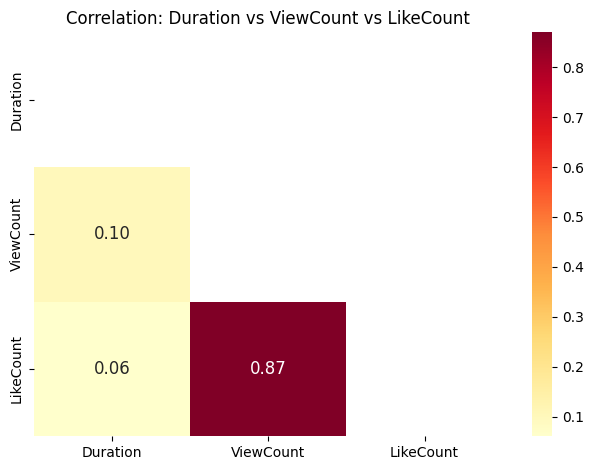

In [58]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='YlOrRd', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation: Duration vs ViewCount vs LikeCount')

plt.tight_layout()
plt.show()

- `Comment:` The correlation coefficients between the video duration and view count (0.1) and between the duration and like count (0.06) suggest a relatively weak relationship. It appears that **the duration has minimal impact on both the view count and like count**.

 ### Question 02: Are there specific tags that appear more frequently in videos with higher engagement metrics?
  
**Answering this question will** helps us determine which tags appear the most in top trending videos, thereby extracting trending tags.
  
**How we answer this question:** : we'll categorize the dataset using interaction level labels determined by view counts: 'low' for videos with minimal views, 'medium' for those with average views, and 'high' for videos with substantial views. Then, we'll identify tags that frequently appear in videos categorized as 'high'.

In [59]:
# extract tags from df
tags = df['tags'].str.split('|', expand=True)  # Splitting tags into separate columns

# add engagement level category based on viewCount
tmp = df.copy()
tmp['engagement_level'] = pd.qcut(tmp['viewCount'], q=3, labels=['low', 'medium', 'high'])

# combine tags with engagement levels
tag_engagement = pd.concat([tags, tmp['engagement_level']], axis=1)

# melt the DataFrame to have each tag in a separate row
tag_melted = tag_engagement.melt(id_vars='engagement_level', value_vars=[0, 1, 2, 3], value_name='tag')

# drop NaN values resulting from the melt operation
tag_melted = tag_melted.dropna(subset=['tag'])

# count tag occurrences in each engagement level
tag_frequency = tag_melted.groupby(['engagement_level', 'tag']).size().reset_index(name='frequency')

# extract rows where 'engagement_level' is 'high'
high_engagement_tags = tag_frequency[tag_frequency['engagement_level'] == 'high']

# sort tags by frequency in descending order
sorted_high_tags = high_engagement_tags.sort_values(by='frequency', ascending=False)

sorted_high_tags.head(10)

C:\Users\HP\AppData\Local\Temp\ipykernel_18488\3511679232.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tag_frequency = tag_melted.groupby(['engagement_level', 'tag']).size().reset_index(name='frequency')


,engagement_level,tag,frequency
112466,high,deep learning,1461
122021,high,machine learning,1449
111150,high,data science,1382
127893,high,python,1206
105083,high,ai,957
106147,high,artificial intelligence,808
133322,high,tech with tim,775
127564,high,programming,744
136858,high,yt:cc=on,650
98962,high,Machine Learning,570
